### Set up Notebook
Import Functions Necessary to Populate Notebook

In [1]:
#import functions
from functions import *
import warnings
warnings.filterwarnings('ignore')


In [2]:
lv_genes=pd.read_pickle("..//data//interim//lv_genes.pkl")
genes=pd.read_csv("..//data//raw//gene_expression_matrix_2016-03-03//rows-genes.csv")
exp_design=pd.read_csv("..//data//interim//exp_design.csv")
tpm_matrix=pd.read_csv("..//data//interim//tpm_matrix.csv")
tbidata=pd.read_csv("..//data//raw//tbi_data_files.csv")
donor=pd.read_csv("..//data//raw//DonorInformation.csv")

### Perform Hierarchical Clustering
We chose to perform hierarchical clusteirng to see how genes and samples cluster.  The clustermap helps to visualize this.  We can see an intiial cluster of primarily Dementia samples with higher expression of the genes also clustered at the top left.  There is a cluster of non-dementia samples below this with the inverse pattern.  The remaining clusters seem to be mainly dementia or non-demebtia samples, but the gene expression differences are not as clear.

In [3]:
gene_ids, symbol_map, entrez_map = create_mapping_dicts(lv=lv_genes,genes=genes)

In [4]:
deg_reads=prep_matrix_for_clustering(tpm_matrix, gene_ids, symbol_map,)

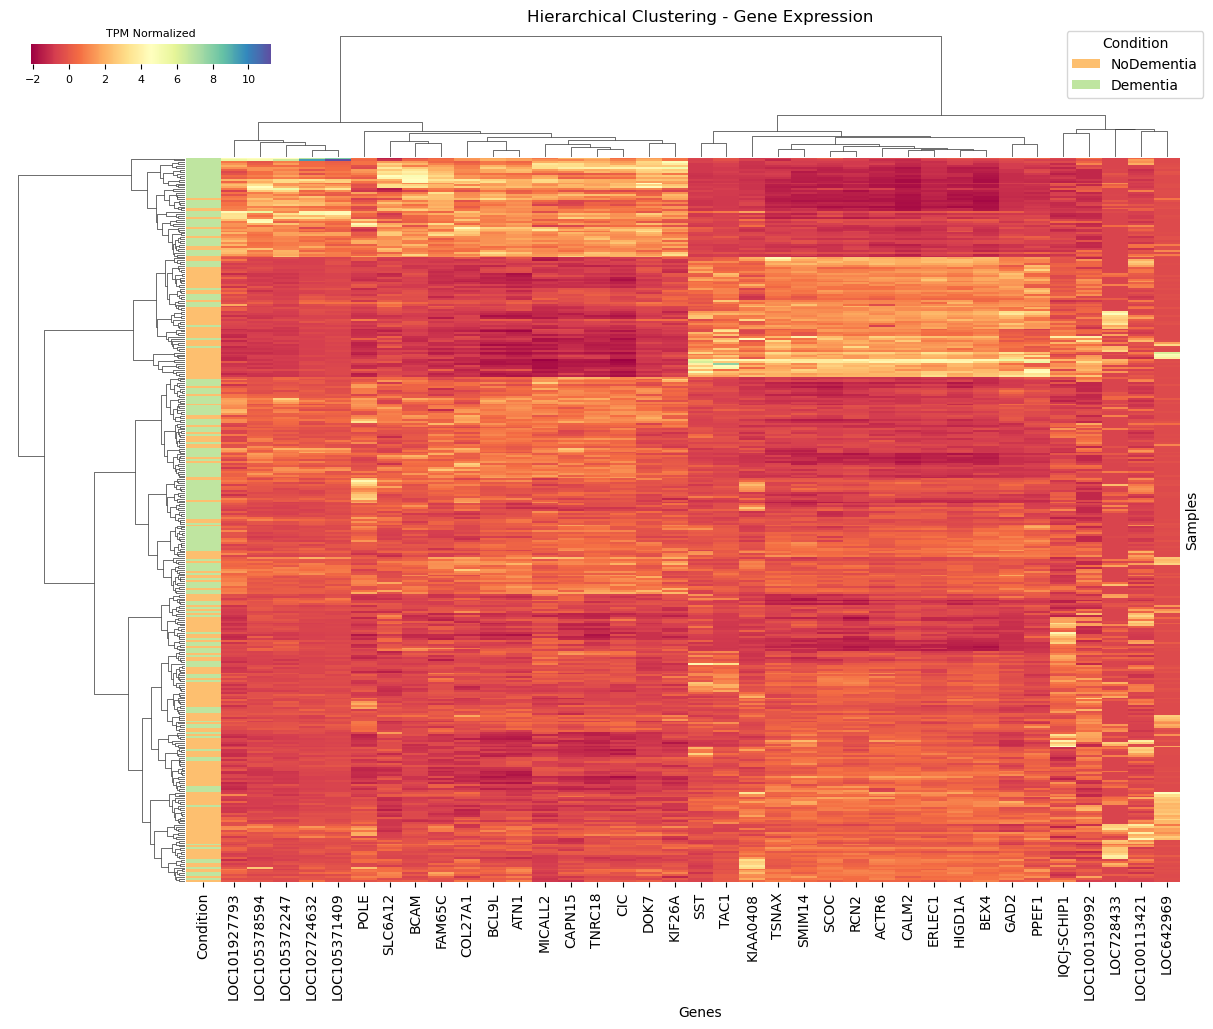

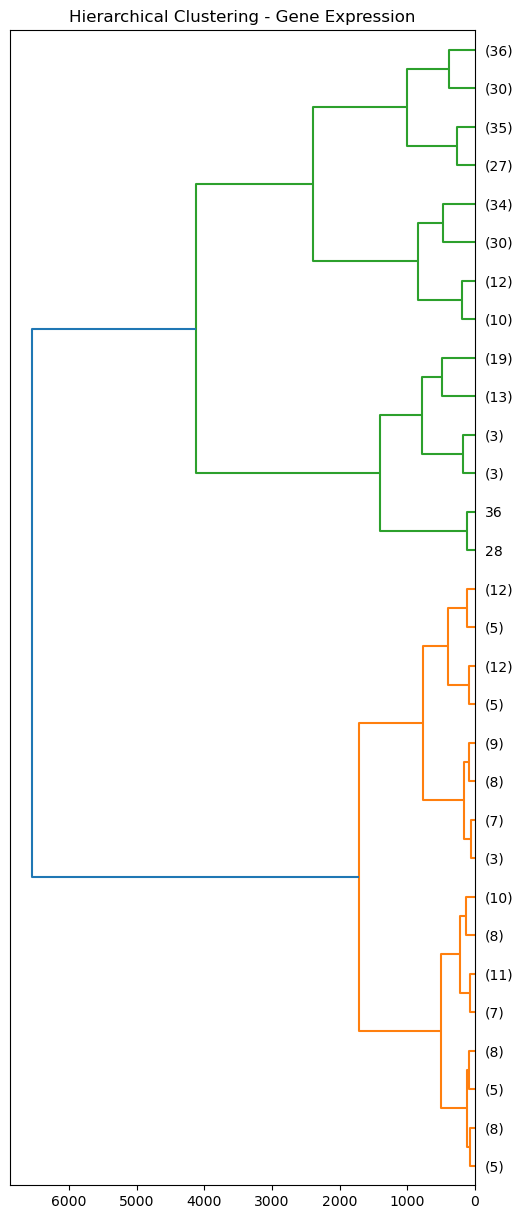

In [5]:
hierarchical_clustering(deg_reads, exp_design)


### Perform Other Clustering - K-means, K-medoids, HDBSCAN
We also clustered samples using these three algorithms. K-means and K-medoids seemed to pick up some differences between the samples with dementia and without dementia, but there is some noise where samples end up in enexpected clusters.

In [6]:
#scale data
x=scale_deg_reads(deg_reads)

kmeans evaluation
cluster 2: davies-bouldin: 1.3153496930216075 calinski harabasz: 183.46208155330186 silhouette: 0.2731337857591709
cluster 3: davies-bouldin: 1.3843771883115874 calinski harabasz: 152.20581682456861 silhouette: 0.22702028940617514
cluster 4: davies-bouldin: 1.7150475630843682 calinski harabasz: 122.74208621807072 silhouette: 0.15255265211943883
cluster 5: davies-bouldin: 1.849496535188387 calinski harabasz: 100.01525005293158 silhouette: 0.13155005767688616
cluster 6: davies-bouldin: 1.8093465431367928 calinski harabasz: 91.74250764351804 silhouette: 0.133667441617971
cluster 7: davies-bouldin: 1.9534369918508603 calinski harabasz: 79.84289600239856 silhouette: 0.11852745597633157
cluster 8: davies-bouldin: 1.8264303751605193 calinski harabasz: 76.43865289512891 silhouette: 0.10509150688729593
cluster 9: davies-bouldin: 1.8336778021483977 calinski harabasz: 72.08197173317885 silhouette: 0.11052938164593885
cluster 10: davies-bouldin: 1.9063828808350736 calinski haraba

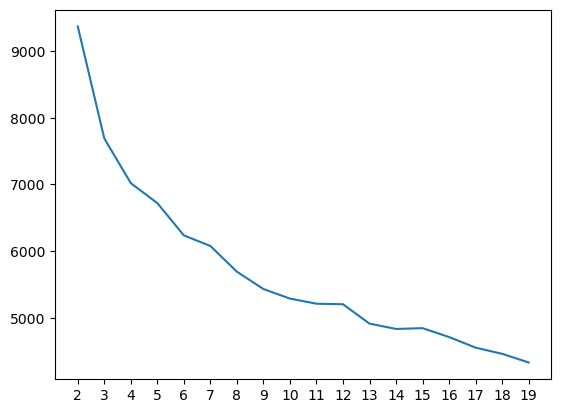

kmedoids evaluation
cluster 2: davies-bouldin: 1.268279321863394 calinski harabasz: 179.9606508437741 silhouette: 0.28627847016801733
cluster 3: davies-bouldin: 1.5084348611201233 calinski harabasz: 144.37856262149054 silhouette: 0.19373877693290323
cluster 4: davies-bouldin: 1.9611894168913444 calinski harabasz: 116.37875073104279 silhouette: 0.12314200978795407
cluster 5: davies-bouldin: 1.8905217525383091 calinski harabasz: 95.30763795564951 silhouette: 0.11307510713653539
cluster 6: davies-bouldin: 2.1576373495814285 calinski harabasz: 80.70673998684845 silhouette: 0.08565694930784357
cluster 7: davies-bouldin: 2.2679096733537953 calinski harabasz: 71.73779325128073 silhouette: 0.07480891375248336
cluster 8: davies-bouldin: 2.260270860672065 calinski harabasz: 64.7078649929913 silhouette: 0.07504127884817942
cluster 9: davies-bouldin: 2.2775497843678445 calinski harabasz: 62.17363243085319 silhouette: 0.07569832594669286
cluster 10: davies-bouldin: 2.0708107641659517 calinski harab

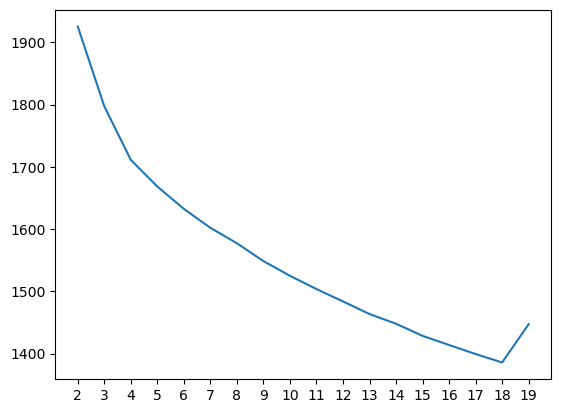

In [7]:
labels_kmeans=kmeans_clustering(x)
labels_kmed=kmedoids_clustering(x)
db_labels=hdbscan_clustering(x)

In [8]:
pca_res=pca_analysis(x)

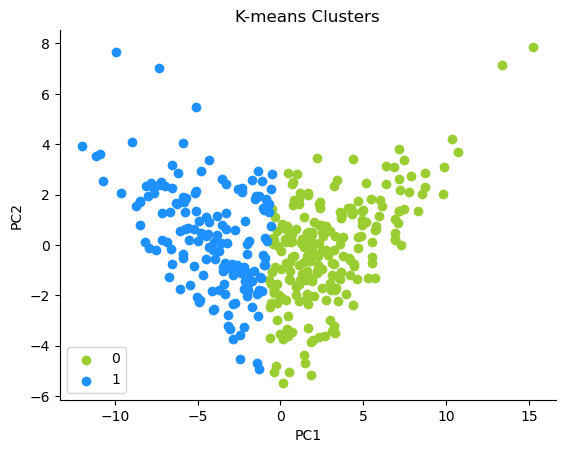

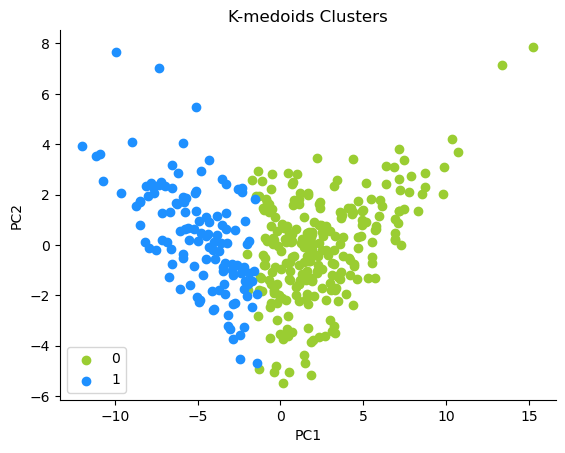

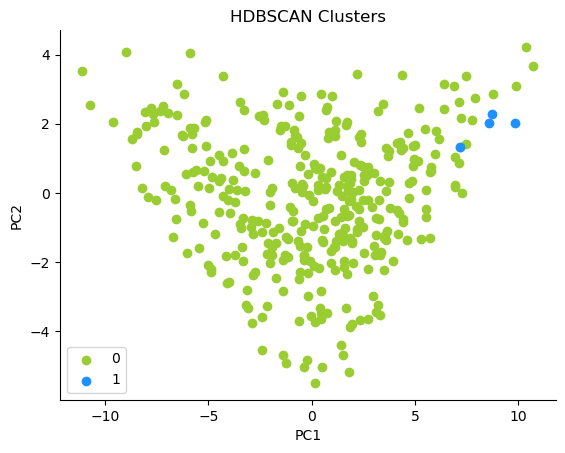

In [9]:
cluster_pca_graphs(n_clusters=2, labels=labels_kmeans, pca_res=pca_res, title='K-means Clusters')
cluster_pca_graphs(n_clusters=2, labels=labels_kmed, pca_res=pca_res, title='K-medoids Clusters')
cluster_pca_graphs(n_clusters=2, labels=db_labels, pca_res=pca_res, title='HDBSCAN Clusters')




In [10]:
clustering, clusters_df = cluster_demo_graphs(
    labels_kmeans,
    labels_kmed,
    db_labels,
    deg_reads,
    tbidata,
    donor,
)

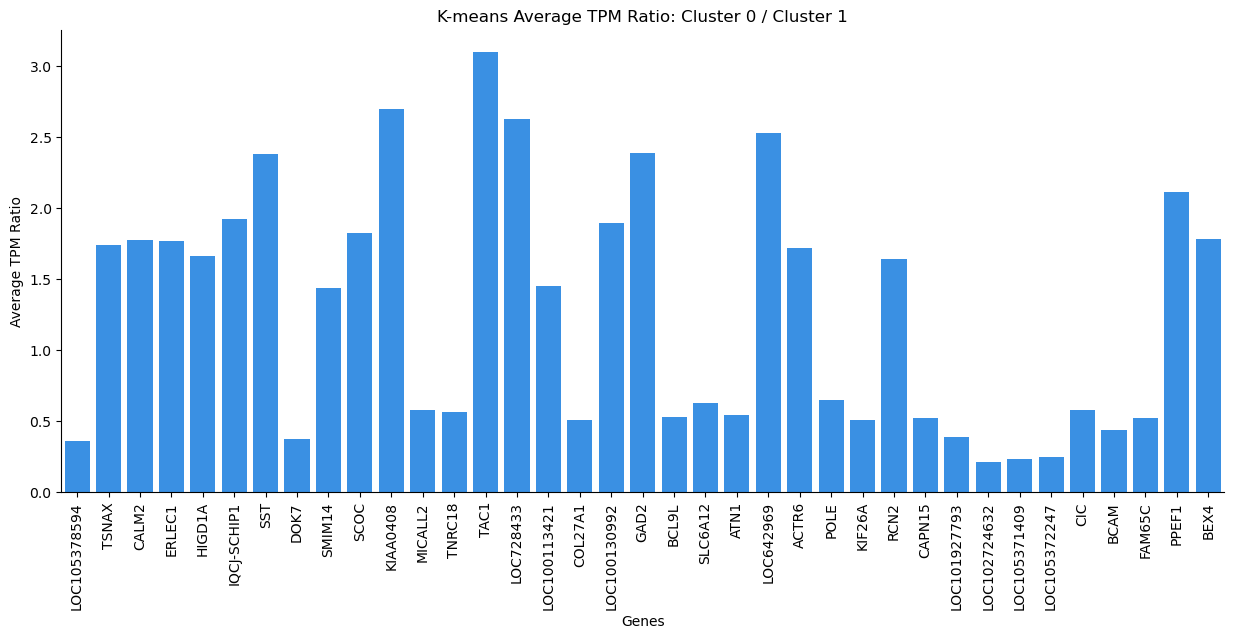

In [11]:
gene_expression_diff_graph(labels=labels_kmeans, clustering=clustering, title='K-means Average TPM Ratio: Cluster 0 / Cluster 1')

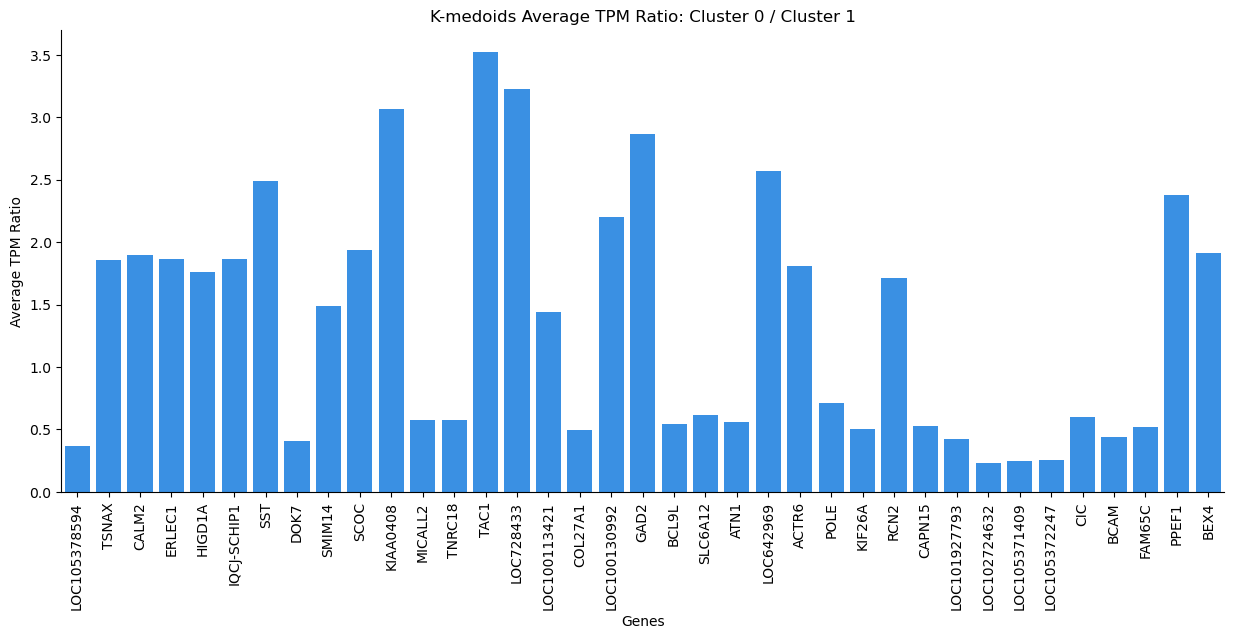

In [12]:
gene_expression_diff_graph(labels=labels_kmed, clustering=clustering, title='K-medoids Average TPM Ratio: Cluster 0 / Cluster 1')

In [13]:
clusters_df.columns

Index(['LOC105378594', 'TSNAX', 'CALM2', 'ERLEC1', 'HIGD1A', 'IQCJ-SCHIP1',
       'SST', 'DOK7', 'SMIM14', 'SCOC', 'KIAA0408', 'MICALL2', 'TNRC18',
       'TAC1', 'LOC728433', 'LOC100113421', 'COL27A1', 'LOC100130992', 'GAD2',
       'BCL9L', 'SLC6A12', 'ATN1', 'LOC642969', 'ACTR6', 'POLE', 'KIF26A',
       'RCN2', 'CAPN15', 'LOC101927793', 'LOC102724632', 'LOC105371409',
       'LOC105372247', 'CIC', 'BCAM', 'FAM65C', 'PPEF1', 'BEX4',
       'labels_kmeans', 'labels_db', 'labels_kmed', 'structure_name',
       'rnaseq_profile_id', 'age', 'sex', 'apo_e4_allele', 'education_years',
       'age_at_first_tbi', 'longest_loc_duration', 'cerad', 'num_tbi_w_loc',
       'dsm_iv_clinical_diagnosis', 'control_set', 'nincds_arda_diagnosis',
       'ever_tbi_w_loc', 'race', 'hispanic', 'act_demented', 'braak',
       'nia_reagan'],
      dtype='object')

In [14]:
lst=[]
for i in ['0','1']:
    dementia_percent=len(clusters_df[(clusters_df['act_demented']=='Dementia') & (clusters_df['labels_kmeans']==i)])/len(clusters_df[(clusters_df['labels_kmeans']==i)])
    
    no_dementia_percent=len(clusters_df[(clusters_df['act_demented']=='No Dementia') & (clusters_df['labels_kmeans']==i)])/len(clusters_df[(clusters_df['labels_kmeans']==i)])
    lst.append((i,no_dementia_percent, 'No Dementia')  )
    lst.append((i,dementia_percent, 'Dementia'))

dementia_percent_df=pd.DataFrame(lst,columns=['Cluster','Value','Status'])


In [15]:
dementia_percent_df=dementia_percent_df.pivot(index='Cluster',columns='Status',values='Value')

Status,Dementia,No Dementia
Cluster,,
0,31.111111,68.888889
1,72.368421,27.631579


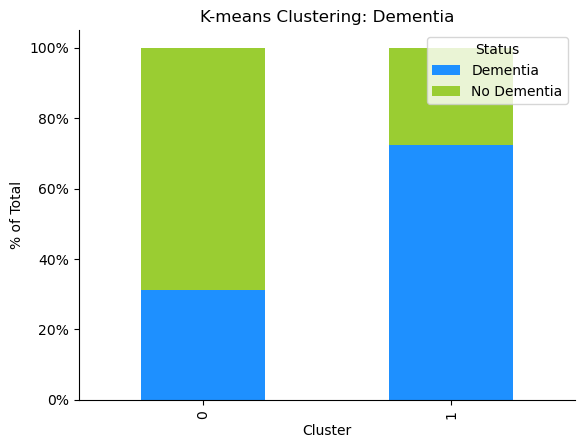

In [16]:
kmeans_dementia_df=dementia_cluster_plot(clusters_df=clusters_df, labels='labels_kmeans', title='K-means Clustering: Dementia')
kmeans_dementia_df.head()

Status,Dementia,No Dementia
Cluster,,
0,34.387352,65.612648
1,75.000000,25.000000


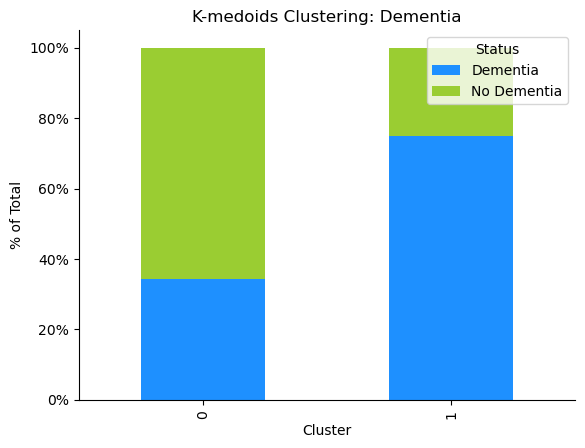

In [17]:
kmeds_dementia_df=dementia_cluster_plot(clusters_df=clusters_df, labels='labels_kmed', title='K-medoids Clustering: Dementia')
kmeds_dementia_df.head()
